In [1]:
import qiskit #libraries importing

In [2]:
qiskit.__version__   #version check

'0.16.4'

In [3]:
# TO send the circuits which we buid on our computer to quantum device we need to have an ibmq account 
  # and get access to quantum cmputer from the ibmq account through the api token which was taken from the 'MY account'
    # we need to debug te code on quantum simulator first before sending it to real quantum computer...

In [4]:
from qiskit import IBMQ  # getting the quantum computer inteface

In [5]:
IBMQ.save_account('54c6c425c6d908102fa3a1579f3008a11ca07f5d8985b3beed14eaf7283b5db0bb7c88494d511c40e74c478cb16e8abd897bda9f7ceef8362e91c02548f99abc')

configrc.store_credentials:WARNING:2021-02-25 20:59:26,983: Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account()  # loading our account

C:\Users\Usman\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
from qiskit import *

In [8]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)

In [9]:
circuit=QuantumCircuit(qr,cr) #building a circuit with 2 quantum registers and 2 classical registers

In [10]:
matplotlib inline

In [11]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [12]:
circuit.h(qr[0])  #drawing a hadamard gate

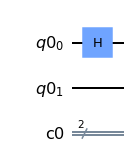

In [13]:
circuit.draw(output='mpl') #drawinfg a neat visualization

In [14]:
circuit.cx(qr[0],qr[1])  # two qubit operation is like logical if....if this then that..control is 1st qubit..2nd qubit is target

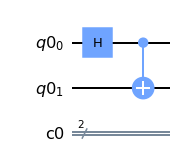

In [15]:
circuit.draw(output='mpl')  ##with these two simple operations(superposition and 2 qubit operation)we can be able to genrate entanglement using q00,q01

In [16]:
## now after building the quantum circuit with hadamard gate and controllednot gate ehat we are going to do is taht 
##  we will measure the quntum bits and take those measuremnts and store thm in classical bits and wht we are gong to do is we are writing code to 
##     measure qubits in the quantum register and store them in classical register

In [17]:
circuit.measure(qr,cr) #we measure the values or positions of qunatum registers and transfer them to the calssical register

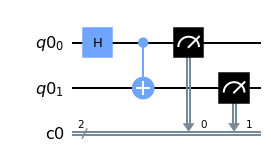

In [18]:
circuit.draw(output='mpl')

In [19]:
simulator=Aer.get_backend('qasm_simulator')

In [20]:
result=execute(circuit,backend=simulator).result()

In [21]:
from qiskit.tools.visualization import plot_histogram

In [22]:
result

Result(backend_name='qasm_simulator', backend_version='0.7.5', qobj_id='616da766-41cf-41d5-a763-9ebf97999e88', job_id='7d5cc03c-a578-4c72-a949-794bc2b161ab', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 515, '0x3': 509}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=1975032889, time_taken=0.0028621, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-02-25T20:59:35.817925, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.5'), metadata={'max_memory_mb': 4011, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0029419}, time_taken=0.0029904842376708984

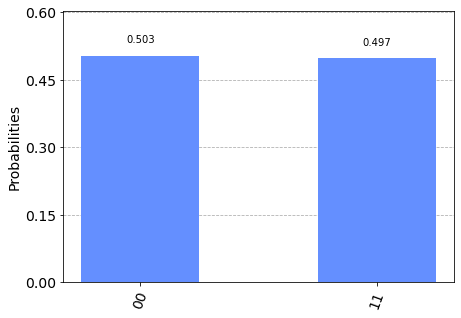

In [23]:
plot_histogram(result.get_counts(circuit)) 

In [24]:
IBMQ.load_account()

C:\Users\Usman\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-25 20:59:37,468: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
 provider=IBMQ.get_provider('ibm-q') #getting the backend from IBM-Q

In [26]:
qcomp=provider.get_backend('ibmq_16_melbourne') # we are providing the bckend

In [27]:
job=execute(circuit,qcomp) #we are trying to execute our circuit on the real quantum computer

In [28]:
from qiskit.tools.monitor import job_monitor  # check the 

In [ ]:
job_monitor(job)    # check the status of jobs

In [30]:
from qiskit.tools.monitor import backend_overview

In [32]:
backend_overview()

ibmq_quito                   ibmq_belem                   ibmq_lima
----------                   ----------                   ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 35             Pending Jobs: 47             Pending Jobs: 48
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      86.8           Avg. T1:      72.3           Avg. T1:      83.1
Avg. T2:      67.8           Avg. T2:      86.6           Avg. T2:      85.9



ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 4360           Pending Jobs: 3995           Pending Jobs: 23
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operatio

In [ ]:
plot_histogram(result.get_counts(job)) 